# Deep Learning Wine Quality Predictor

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
df = pd.read_csv(r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 14\2\01-Ins_Deep_Learning\Resources\winequality.csv',
                 delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values

y = df["quality"].values

In [7]:
# Define the model - shallow neural net
number_hidden_nodes = 8

number_input_features = 11

nn = Sequential()

# Hidden layer
nn.add(Dense(units=number_hidden_nodes,
             input_dim=number_input_features,
             activation='relu'))

# Output layer
nn.add(Dense(units=1,
             activation="linear"))

In [8]:
# Compile the model
nn.compile(loss="mean_squared_error",
           optimizer="adam",
           metrics=["mse"])

# Train the model

model_1 = nn.fit(X,
                 y,
                 validation_split=0.3,
                 epochs=200)

Epoch 1/200
35/35 [==============================] - 5s 18ms/step - loss: 882.1615 - mse: 882.1615 - val_loss: 583.5133 - val_mse: 583.5133
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 495.4577 - mse: 495.4577 - val_loss: 315.2725 - val_mse: 315.2725
Epoch 3/200
35/35 [==============================] - 0s 4ms/step - loss: 260.8454 - mse: 260.8454 - val_loss: 142.7911 - val_mse: 142.7911
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 112.0755 - mse: 112.0755 - val_loss: 48.2749 - val_mse: 48.2749
Epoch 5/200
35/35 [==============================] - 0s 4ms/step - loss: 38.7635 - mse: 38.7635 - val_loss: 14.3654 - val_mse: 14.3654
Epoch 6/200
35/35 [==============================] - 0s 4ms/step - loss: 14.3411 - mse: 14.3411 - val_loss: 7.7383 - val_mse: 7.7383
Epoch 7/200
35/35 [==============================] - 0s 7ms/step - loss: 8.5644 - mse: 8.5644 - val_loss: 7.5319 - val_mse: 7.5319
Epoch 8/200
35/35 [===========================

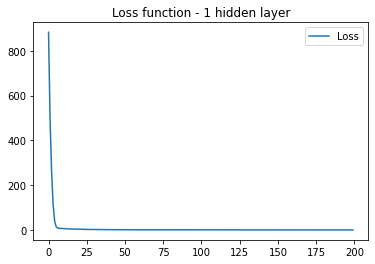

In [9]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("Loss function - 1 hidden layer")
plt.legend(["Loss"])
plt.show()

In [12]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4


nn = Sequential()

# First hidden layer
nn.add(Dense(units=hidden_nodes_layer1,
             input_dim=number_input_features,
             activation="relu"))

# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2,
             activation="relu"))

# Output layer
nn.add(Dense(units=1,
             activation="linear"))

In [13]:
# Compile model
nn.compile(loss="mean_squared_error",
           optimizer="adam",
           metrics=["mse"])

# Fit the model
model_2 = nn.fit(X,
                 y,
                 validation_split=0.3,
                 epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 5ms/step - loss: 214.3102 - mse: 214.3102 - val_loss: 105.8827 - val_mse: 105.8827
Epoch 2/200
35/35 [==============================] - 0s 3ms/step - loss: 40.9461 - mse: 40.9461 - val_loss: 6.2045 - val_mse: 6.2045
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 4.8121 - mse: 4.8121 - val_loss: 5.3304 - val_mse: 5.3304
Epoch 4/200
35/35 [==============================] - 0s 7ms/step - loss: 3.2309 - mse: 3.2309 - val_loss: 3.7071 - val_mse: 3.7071
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 2.5125 - mse: 2.5125 - val_loss: 3.0226 - val_mse: 3.0226
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 2.0029 - mse: 2.0029 - val_loss: 2.2419 - val_mse: 2.2419
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 1.6460 - mse: 1.6460 - val_loss: 1.8723 - val_mse: 1.8723
Epoch 8/200
35/35 [==============================] - 0s 5ms/step - loss: 

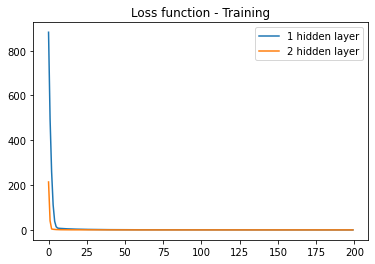

In [17]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("Loss function - Training")
plt.legend(["1 hidden layer", "2 hidden layer"])
plt.show()

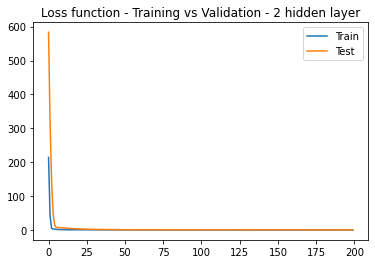

In [20]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("Loss function - Training vs Validation - 2 hidden layer")
plt.legend(["Train", "Test"])
plt.show()